In [7]:
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io

img = img_as_float(io.imread('Training_Data/Or 13006_0172.tif'))



array([[0.92156863, 0.87843137, 0.81960784],
       [0.92156863, 0.87843137, 0.81960784],
       [0.92156863, 0.8745098 , 0.81960784],
       ...,
       [0.83137255, 0.78431373, 0.69803922],
       [0.83529412, 0.78823529, 0.70196078],
       [0.83529412, 0.78823529, 0.70196078]])

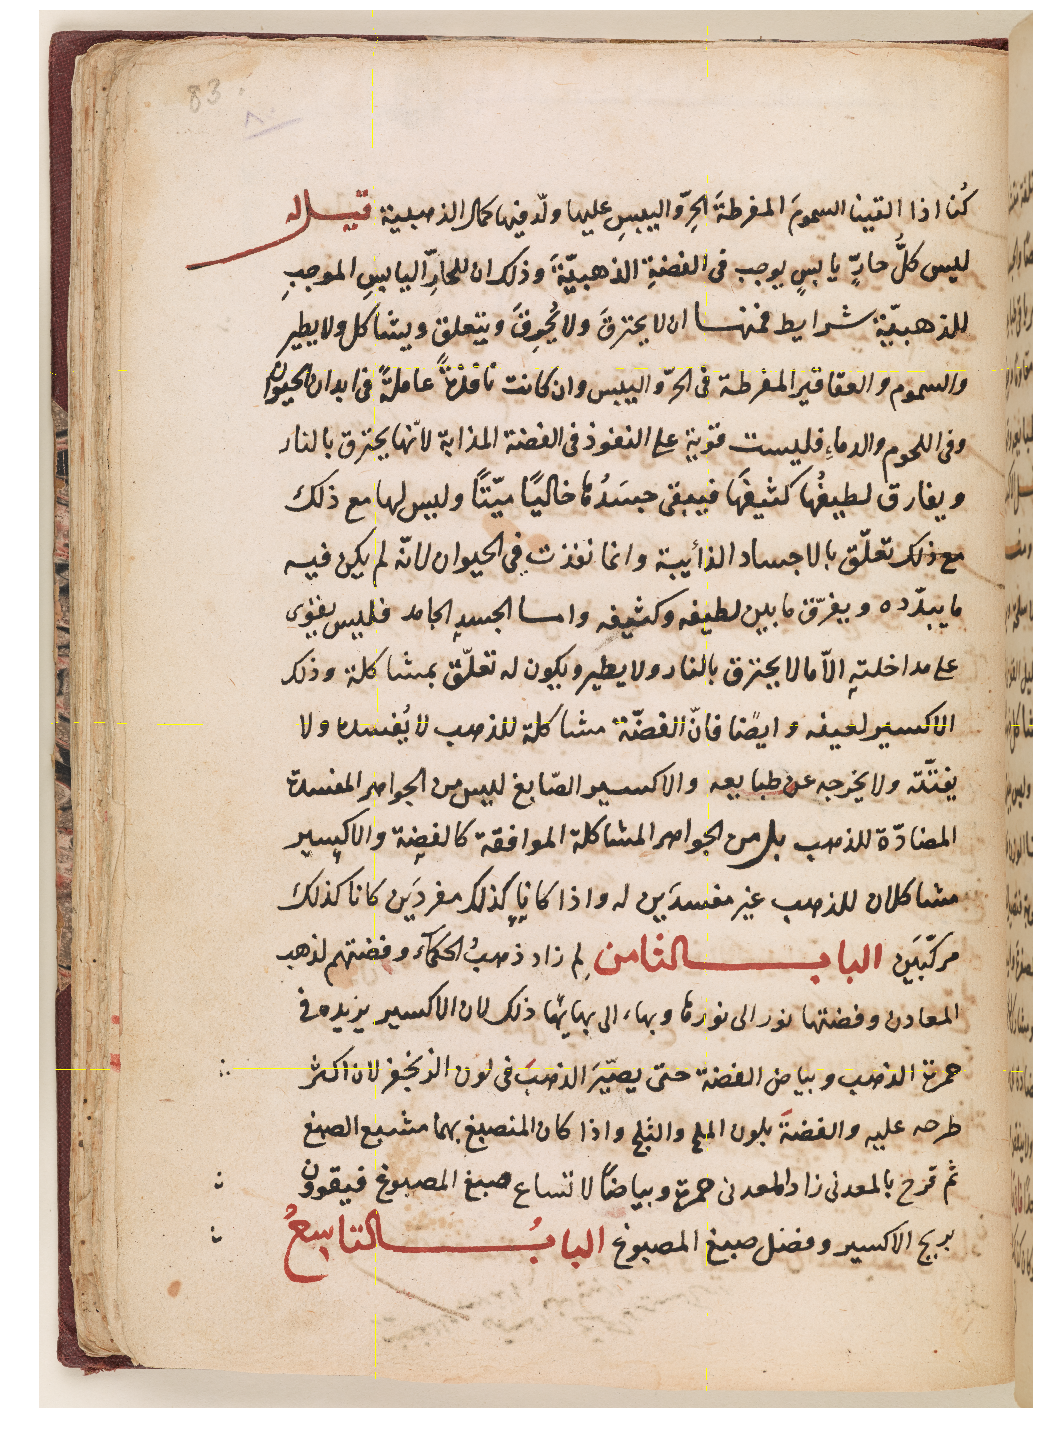

In [14]:
segments_quick = slic(img, n_segments=10, sigma=10, compactness=100, max_iter=10)
plt.figure(figsize=(20,20))
plt.imshow(mark_boundaries(img, segments_quick, outline_color=(0,0,0), mode='thick'))
plt.axis('off')
plt.tight_layout()
plt.show()

In [30]:
seg = slic(img, n_segments=400, sigma=5, compactness=500)

In [31]:
seg

array([[  0,   0,   0, ...,  16,  16,  16],
       [  0,   0,   0, ...,  16,  16,  16],
       [  0,   0,   0, ...,  16,  16,  16],
       ...,
       [391, 391, 391, ..., 397, 397, 397],
       [391, 391, 391, ..., 397, 397, 397],
       [391, 391, 391, ..., 397, 397, 397]])

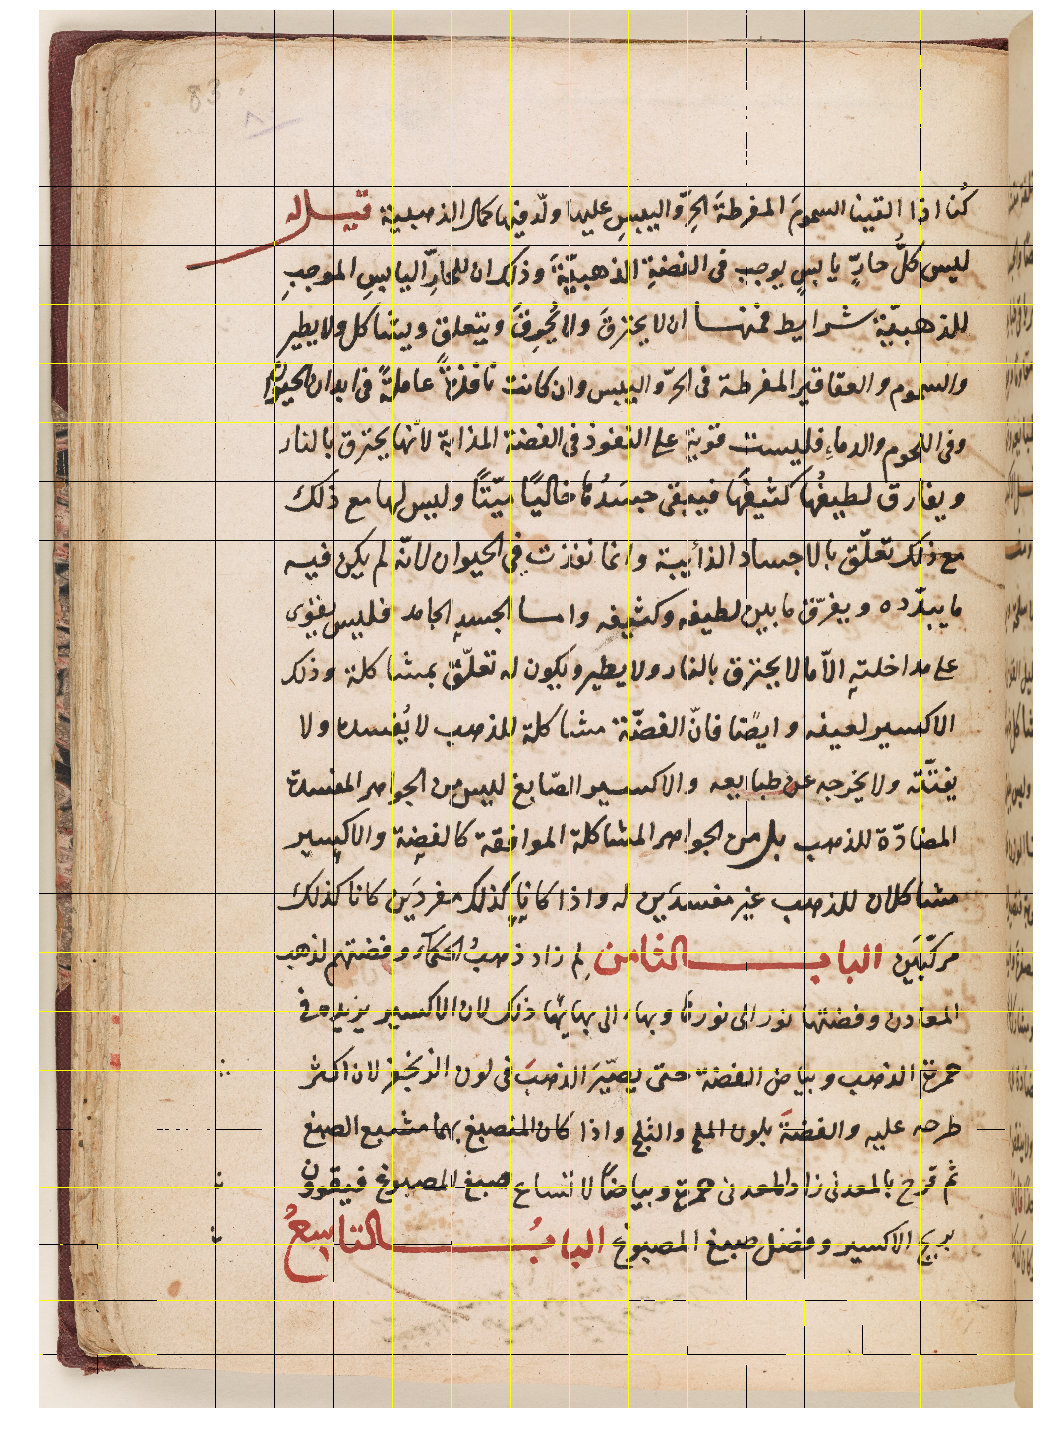

In [32]:
plt.figure(figsize=(20,20))
plt.imshow(mark_boundaries(img, seg, outline_color=(0,0,0)))
plt.axis('off')
plt.tight_layout()
plt.show()

In [22]:
segments_quick

array([[ 0,  0,  0, ...,  2,  2,  2],
       [ 0,  0,  0, ...,  2,  2,  2],
       [ 0,  0,  0, ...,  2,  2,  2],
       ...,
       [10, 10, 10, ..., 11, 11, 11],
       [10, 10, 10, ..., 11, 11, 11],
       [10, 10, 10, ..., 11, 11, 11]])

In [ ]:
segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_fz))))
print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))
print('Quickshift number of segments: {}'.format(len(np.unique(segments_quick))))

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True,
                       subplot_kw={'adjustable': 'box-forced'})

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()